In [21]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# import cleaned data file
df = pd.read_csv("_data/df-clean.csv")

In [4]:
df.head()

,Unnamed: 0,Job,Clocked In,Clocked Out,Duration,Earnings,Date,Month,Day,Year,Is Holiday,Holiday Name,Day of Week,Hourly Rate,Season
0,0,Macianos,16:40:00,18:45:00,2.08,59,2020-08-03,8,3,2020,False,NaN,Monday,28.37,Summer
1,1,Macianos,16:08:00,21:52:00,5.73,108,2020-08-04,8,4,2020,False,NaN,Tuesday,18.85,Summer
2,2,Macianos,17:01:00,21:15:00,4.23,81,2020-08-05,8,5,2020,False,NaN,Wednesday,19.15,Summer
3,3,Macianos,16:25:00,22:17:00,5.87,124,2020-08-06,8,6,2020,False,NaN,Thursday,21.12,Summer
4,4,Macianos,16:25:00,21:30:00,5.08,122,2020-08-07,8,7,2020,False,NaN,Friday,24.02,Summer


In [5]:
# Average amount of tips over time
print("Mean of Earnings:", (np.mean(df['Earnings'])).round(2) )
print("Median of Earnings:", (np.median(df['Earnings'])).round(2) )

Mean of Earnings: 133.27
Median of Earnings: 119.0


In [6]:
# separate data into $3 vs $4 tips
tip_3 = df[df['Job'] == 'Macianos']
tip_4 = df[df['Job'] == 'Maciano 2']

tip_4
tip_3

,Unnamed: 0,Job,Clocked In,Clocked Out,Duration,Earnings,Date,Month,Day,Year,Is Holiday,Holiday Name,Day of Week,Hourly Rate,Season
0,0,Macianos,16:40:00,18:45:00,2.08,59,2020-08-03,8,3,2020,False,NaN,Monday,28.37,Summer
1,1,Macianos,16:08:00,21:52:00,5.73,108,2020-08-04,8,4,2020,False,NaN,Tuesday,18.85,Summer
2,2,Macianos,17:01:00,21:15:00,4.23,81,2020-08-05,8,5,2020,False,NaN,Wednesday,19.15,Summer
3,3,Macianos,16:25:00,22:17:00,5.87,124,2020-08-06,8,6,2020,False,NaN,Thursday,21.12,Summer
4,4,Macianos,16:25:00,21:30:00,5.08,122,2020-08-07,8,7,2020,False,NaN,Friday,24.02,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Macianos,14:22:00,20:06:00,5.73,174,2021-06-27,6,27,2021,False,NaN,Sunday,30.37,Summer
176,176,Macianos,16:00:00,20:45:00,4.75,100,2021-07-01,7,1,2021,False,NaN,Thursday,21.05,Summer
177,177,Macianos,16:21:00,20:28:00,4.12,119,2021-07-02,7,2,2021,False,NaN,Friday,28.88,Summer
178,178,Macianos,16:20:00,20:49:00,4.48,108,2021-07-03,7,3,2021,False,NaN,Saturday,24.11,Summer


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    308 non-null    int64  
 1   Job           308 non-null    object 
 2   Clocked In    308 non-null    object 
 3   Clocked Out   308 non-null    object 
 4   Duration      308 non-null    float64
 5   Earnings      308 non-null    int64  
 6   Date          308 non-null    object 
 7   Month         308 non-null    int64  
 8   Day           308 non-null    int64  
 9   Year          308 non-null    int64  
 10  Is Holiday    308 non-null    bool   
 11  Holiday Name  18 non-null     object 
 12  Day of Week   308 non-null    object 
 13  Hourly Rate   308 non-null    float64
 14  Season        308 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 34.1+ KB


### Line Chart Analysis

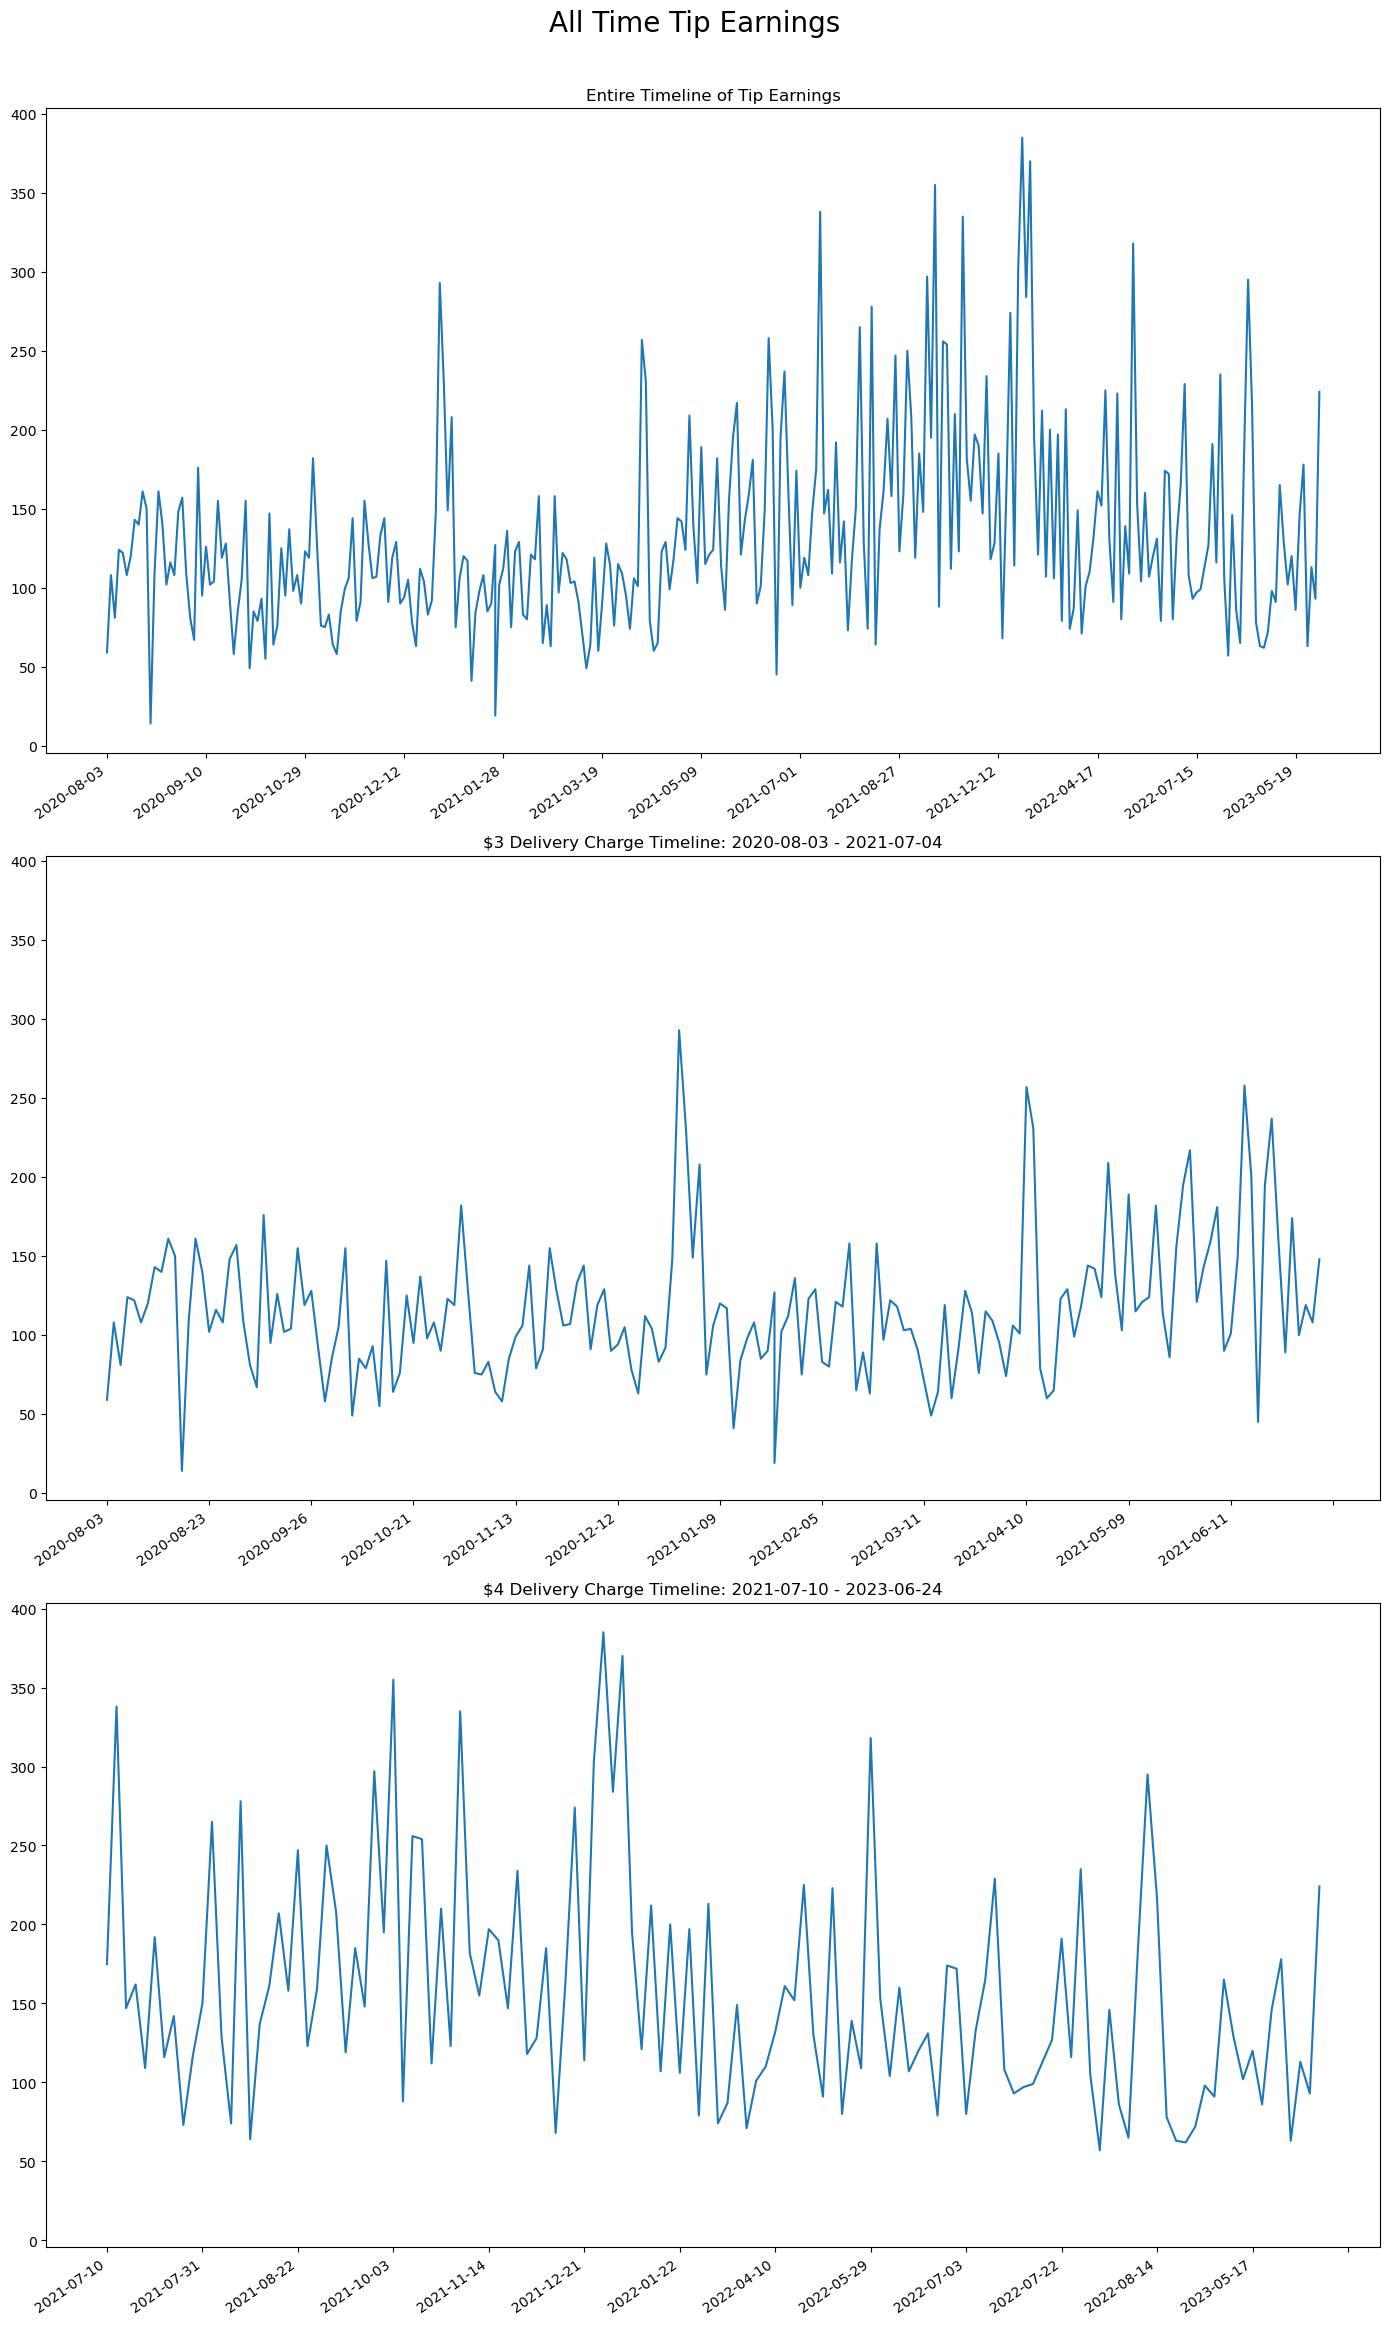

In [84]:
# Line Charts for tip earnings: all time, $3 period, $4 period

fig, axs = plt.subplots(3, 1, figsize=(14, 23), sharey=True)

plt.suptitle('All Time Tip Earnings', y=1.009, fontsize=20)

# 1. Line chart of earning over all shifts worked
days      = list(df['Date'])
earnings  = list(df['Earnings'])
axs[0].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[0].set_title('Entire Timeline of Tip Earnings')

# 2. Line chart over the $3 delivery charge time period, 180 total days
# 2020-08-03 - 2021-07-04
delivery_charge_3 = df[df['Job'] == 'Macianos']
days      = list(delivery_charge_3['Date'])
earnings  = list(delivery_charge_3['Earnings'])
axs[1].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[1].set_title('$3 Delivery Charge Timeline: 2020-08-03 - 2021-07-04')

# 3. Line chart over the $4 delivery charge time period, 180 total days
# 2021-07-10 - 2023-06-24
delivery_charge_4 = df[df['Job'] == 'Maciano 2']
days      = list(delivery_charge_4['Date'])
earnings  = list(delivery_charge_4['Earnings'])
axs[2].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[2].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[2].set_title('$4 Delivery Charge Timeline: 2021-07-10 - 2023-06-24')

# rotate x-axis labels for all subplots
for ax in axs:
    # Adjust the rotation angle, alighn label to the right
    plt.setp(ax.get_xticklabels(), rotation=35, ha='right')  

plt.tight_layout()
plt.show()
